In [2]:
## import package bonanza
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2
import pandas as pd
import numpy
import json
from pivottablejs import pivot_ui
import nltk
import unicodedata
import twitter_text
import re
from collections import Counter
import regex
from nltk.tokenize import RegexpTokenizer
from string import digits
from collections import defaultdict
import time
from configparser import ConfigParser
from gensim import corpora, models, similarities
tokenizer = RegexpTokenizer(r'\w+')
from string import digits
from geopy.geocoders import Nominatim, GoogleV3
import numpy as np
import math

In [3]:
#In Python: Define a database name (we're using a dataset on births, so I call it 
# birth_db), and your username for your computer (CHANGE IT BELOW). 
dbname = '160131_db'
username = 'kristinaac'

## 'engine' is a connection to a database
## Here, we're using postgres, but sqlalchemy can connect to other things too.
engine = create_engine('postgres://%s@localhost/%s'%(username,dbname))
print engine.url



postgres://kristinaac@localhost/160131_db


In [12]:
# connect:
con = None
con = psycopg2.connect(database = dbname, user = username)

# query:sql_query = """
#query = """SELECT location,org_text,temp,weather_rating,norm_response_score, point(%s, %s) <@> point(long, lat)::point AS tweet_distance 
           #FROM tweet_weather_table WHERE (point(%s, %s) <@> point(long, lat)) < 50 
           #ORDER by tweet_distance;""" %(query_lon,query_lat,query_lon,query_lat)

sql_query = """SELECT * FROM tweet_weather_table;"""
tweet_data = pd.read_sql_query(sql_query,con)
tweet_data.head(1)

,index,date_stamp,time,location,state,lat,long,org_text,fixed_text,retweet_count,term,temp,weather,weather_rating,temp_rating,affin_score,weather_words,num_weather_words,total_words,norm_response_score
0,5,Wed Jan 20,120161135,"Carbondale, IL",IL,37.717654,-89.223209,Snow day on IL House Res. 477 conference call ...,snow day house res conference call day best re...,0,snow,20.93,overcast_clouds,3,5,0,{snow},1,10,0


In [13]:
limit= 0
neg_data = tweet_data.loc[tweet_data['norm_response_score'] <-limit].sort_values('norm_response_score',axis = 0, ascending=True)
pos_data = tweet_data.loc[tweet_data['norm_response_score'] > limit].sort_values('norm_response_score',axis = 0, ascending=False)



/Users/kristinaac/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


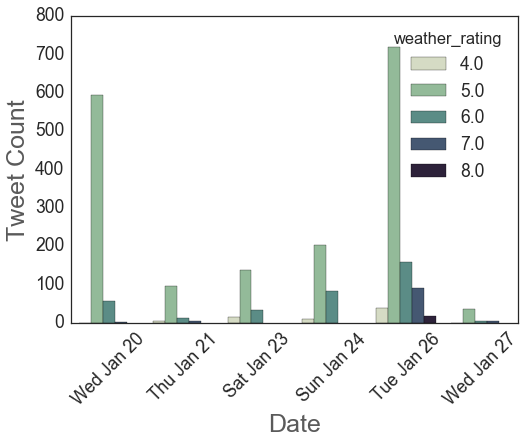

In [14]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
sns.set_style('darkgrid') 
plt.rcParams['figure.figsize'] = 20, 50  # plotsize 
sns.set(context='notebook', style='white', palette='deep', font='sans-serif', font_scale=1.75)



weather_data = tweet_data.sort_values(['weather_rating','time'],axis = 0, ascending=[True,True])
weather_data = weather_data.loc[tweet_data['weather_rating'] >= 4]
weather_counts = sns.countplot(x="date_stamp", data=weather_data,hue='weather_rating',palette=sns.cubehelix_palette(5, start=.5, rot=-.75));
weather_counts.set_xlabel("Date",size = 25,color="#303030",alpha=.80)
weather_counts.set_ylabel("Tweet Count",size = 25,color="#303030",alpha=0.80)
for item in weather_counts.get_xticklabels():
    item.set_rotation(45)

In [17]:
tweet_data = pd.read_sql_query(sql_query,con)

tweet_data = tweet_data.loc[tweet_data['term'] != 'general']
tweet_data.head()
tweet_data = tweet_data.loc[tweet_data['num_weather_words'] > 0]
tweet_data['norm_response_score'] = (tweet_data['affin_score']/4)*tweet_data['weather_rating']

tweet_data = tweet_data.sort_values('norm_response_score',axis = 0, ascending=False)



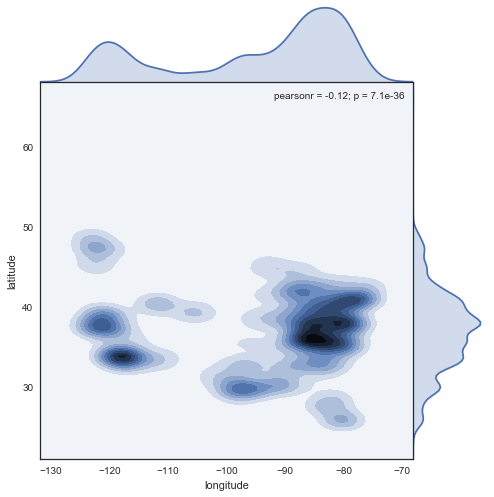

In [67]:
tweet_data = pd.read_sql_query(sql_query,con)

tweet_data = tweet_data.loc[tweet_data['term'] != 'general']
tweet_data.head()
tweet_data = tweet_data.loc[tweet_data['num_weather_words'] > 0]
tweet_data['norm_response_score'] = (tweet_data['affin_score']/4)*tweet_data['weather_rating']

tweet_data = tweet_data.sort_values('norm_response_score',axis = 0, ascending=False)

x1 = pd.Series(tweet_data['long'], name="longitude")
x2 = pd.Series(tweet_data['lat'], name="latitude")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(x1, x2, kind="kde", size=7, space=0)



(-130, -70)

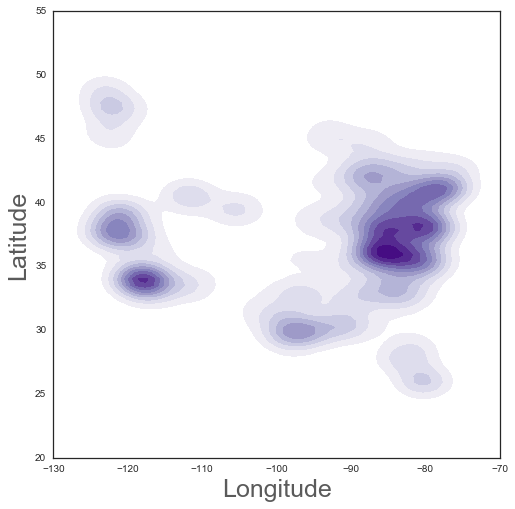

In [85]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")
tweet_data = pd.read_sql_query(sql_query,con)

tweet_data = tweet_data.loc[tweet_data['term'] != 'general']
tweet_data.head()
tweet_data = tweet_data.loc[tweet_data['num_weather_words'] > 0]
tweet_data['norm_response_score'] = (tweet_data['affin_score']/4)*tweet_data['weather_rating']

tweet_data = tweet_data.sort_values('norm_response_score',axis = 0, ascending=False)




# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
#ax.set_aspect("equal")
# Draw the two density plots
ax = sns.kdeplot(tweet_data['long'], tweet_data['lat'],
                 cmap="Purples",shade=True,shade_lowest=False)
#ax = sns.kdeplot(pos_data['long'], pos_data['lat'],
                #cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
ax.set_xlabel("Longitude",size = 25,color="#303030",alpha=.80)
ax.set_ylabel("Latitude",size = 25,color="#303030",alpha=0.80)
ax.set_ylim(20,55)
ax.set_xlim(-130,-70)



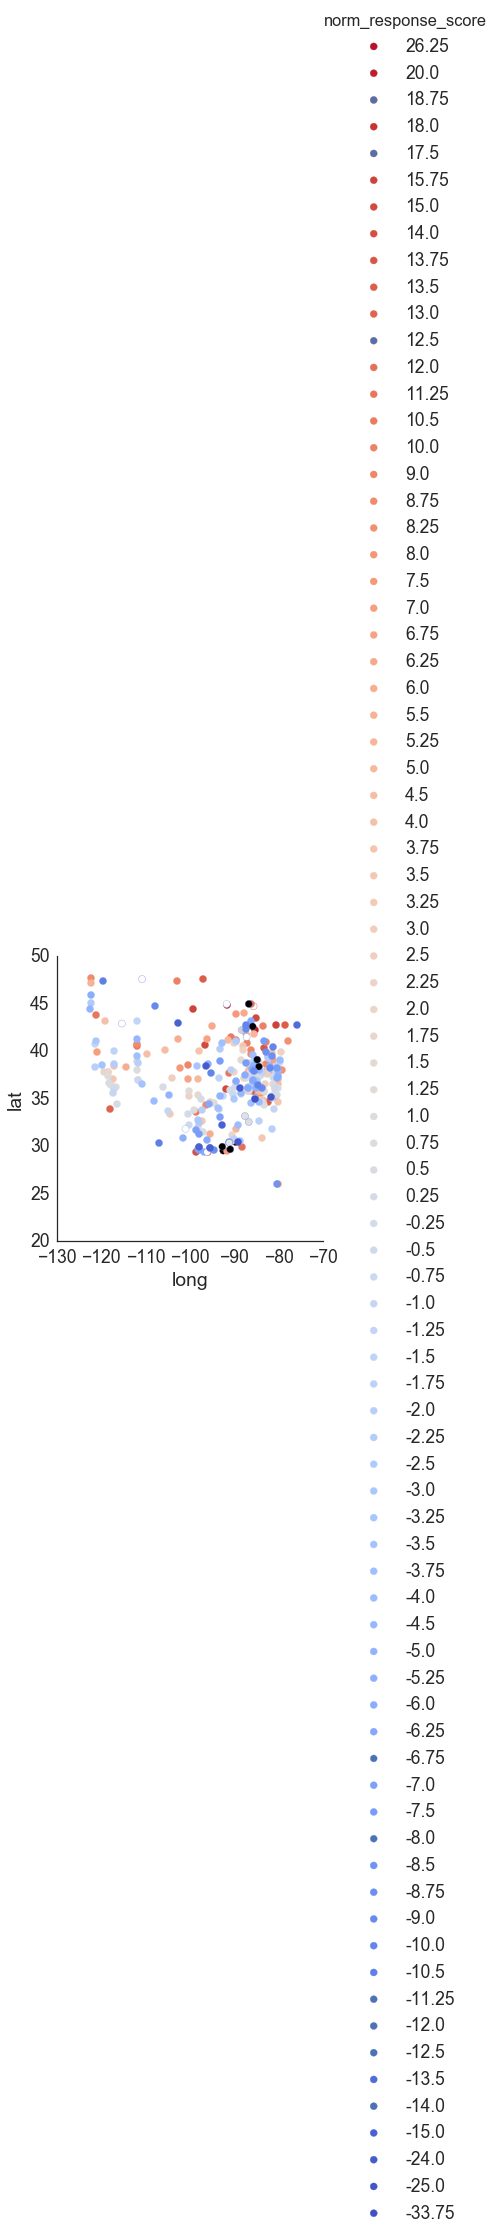

In [20]:

tweet_data = pd.read_sql_query(sql_query,con)

tweet_data = tweet_data.loc[tweet_data['term'] != 'general']
tweet_data.head()
tweet_data = tweet_data.loc[tweet_data['num_weather_words'] > 0]
tweet_data['norm_response_score'] = ((tweet_data['affin_score']/4)*tweet_data['weather_rating']*(tweet_data['num_weather_words']))


tweet_data = tweet_data.sort_values('norm_response_score',axis = 0, ascending=False)


limit = 0
sns.lmplot("long", "lat", data=tweet_data[(tweet_data['norm_response_score'] < -limit) | (tweet_data['norm_response_score'] > +limit)],hue="norm_response_score",x_jitter=.1,fit_reg=False,palette="coolwarm_r",x_bins=5, x_ci=None)



(-130, -70)

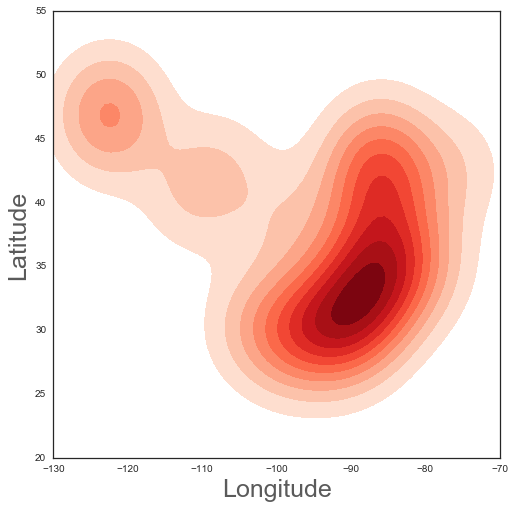

In [64]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")
#iris = sns.load_dataset("iris")

# Subset the iris dataset by species
neg_data = tweet_data.loc[tweet_data['norm_response_score'] < -10]
pos_data = tweet_data.loc[tweet_data['norm_response_score'] > 10]


# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
#ax.set_aspect("equal")
# Draw the two density plots
ax = sns.kdeplot(neg_data['long'], neg_data['lat'],
                 cmap="Reds", shade=True, shade_lowest=False)
#ax = sns.kdeplot(pos_data['long'], pos_data['lat'],
                #cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.set_xlabel("Longitude",size = 25,color="#303030",alpha=.80)
ax.set_ylabel("Latitude",size = 25,color="#303030",alpha=0.80)
ax.set_ylim(20,55)
ax.set_xlim(-130,-70)





(-130, -70)

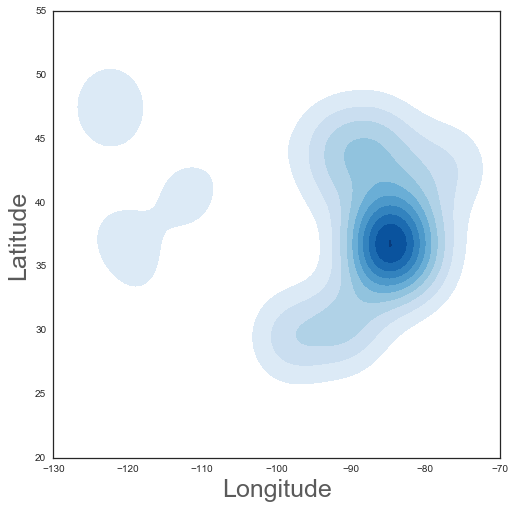

In [63]:
sns.set(style="white")
#iris = sns.load_dataset("iris")

# Subset the iris dataset by species
neg_data = tweet_data.loc[tweet_data['norm_response_score'] < -10]
pos_data = tweet_data.loc[tweet_data['norm_response_score'] > 10]


# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
#ax.set_aspect("equal")
# Draw the two density plots
#ax = sns.kdeplot(pos_data['long'], neg_data['lat'],
                 #cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(pos_data['long'], pos_data['lat'],
                cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
#ax.text(2.5, 8.2, "postive weather response", size=16, color=blue)
#ax.text(3.8, 4.5, "negative weather response", size=16, color=red)
ax.set_xlabel("Longitude",size = 25,color="#303030",alpha=.80)
ax.set_ylabel("Latitude",size = 25,color="#303030",alpha=0.80)
ax.set_ylim(20,55)
ax.set_xlim(-130,-70)


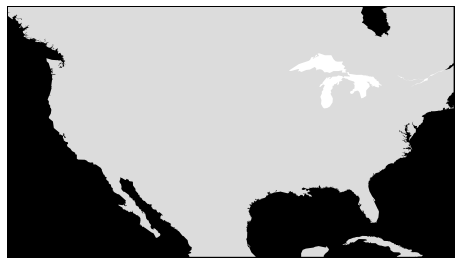

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(8, 8))
themap = Basemap(projection='gall',
              llcrnrlon = -130,              # lower-left corner longitude
              llcrnrlat = 20,               # lower-left corner latitude
              urcrnrlon = -70,               # upper-right corner longitude
              urcrnrlat = 55,               # upper-right corner latitude
              resolution = 'l',
              area_thresh = 100000.0,
              )

#themap.drawcoastlines()
#themap.drawcountries()
themap.fillcontinents(color = 'gainsboro')
themap.drawmapboundary(fill_color='black')